### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

### Carga de dados

In [2]:
base_cadastral_df = pd.read_csv("./dataset/base_cadastral.csv")
base_info_df = pd.read_csv("./dataset/base_info.csv")
base_pagamentos_df = pd.read_csv("./dataset/base_pagamentos_desenvolvimento.csv")
base_teste_df = pd.read_csv("./dataset/base_pagamentos_teste.csv")

### Análises

In [3]:
base_cadastral_df

ID_CLIENTE DATA_CADASTRO  DDD FLAG_PF SEGMENTO_INDUSTRIAL  \
0     1661240395903230676    2013-08-22   99     NaN            Serviços   
1     8274986328479596038    2017-01-25   31     NaN            Comércio   
2      345447888460137901    2000-08-15   75     NaN            Serviços   
3     1003144834589372198    2017-08-06   49     NaN            Serviços   
4      324916756972236008    2011-02-14   88     NaN            Serviços   
...                   ...           ...  ...     ...                 ...   
1310  3431426889924624821    2020-08-13   92     NaN            Serviços   
1311  5288503299611498087    2020-11-03  NaN     NaN            Comércio   
1312   957773253650890560    2021-07-05  NaN     NaN            Comércio   
1313  6094038865287329652    2021-07-05  NaN     NaN            Serviços   
1314  1592581784061157609    2002-05-14   (2     NaN            Comércio   

     DOMINIO_EMAIL    PORTE CEP_2_DIG  
0            YAHOO  PEQUENO        65  
1            YAHOO    MEDIO        77  
2          HOTMAIL  PEQUENO        48  
3          OUTLOOK  PEQUENO        89  
4            GMAIL   GRANDE        62  
...            ...      ...       ...  
1310       HOTMAIL    MEDIO        69  
1311         YAHOO  PEQUENO        13  
1312         GMAIL    MEDIO        20  
1313         GMAIL   GRANDE        48  
1314           NaN    MEDIO        90  

[1315 rows x 8 columns]

In [4]:
base_cadastral_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_CLIENTE           1315 non-null   int64 
 1   DATA_CADASTRO        1315 non-null   object
 2   DDD                  1078 non-null   object
 3   FLAG_PF              66 non-null     object
 4   SEGMENTO_INDUSTRIAL  1232 non-null   object
 5   DOMINIO_EMAIL        1285 non-null   object
 6   PORTE                1274 non-null   object
 7   CEP_2_DIG            1315 non-null   object
dtypes: int64(1), object(7)
memory usage: 82.3+ KB


In [5]:
base_cadastral_df['DATA_CADASTRO'] = pd.to_datetime(base_cadastral_df['DATA_CADASTRO'])

<Axes: >

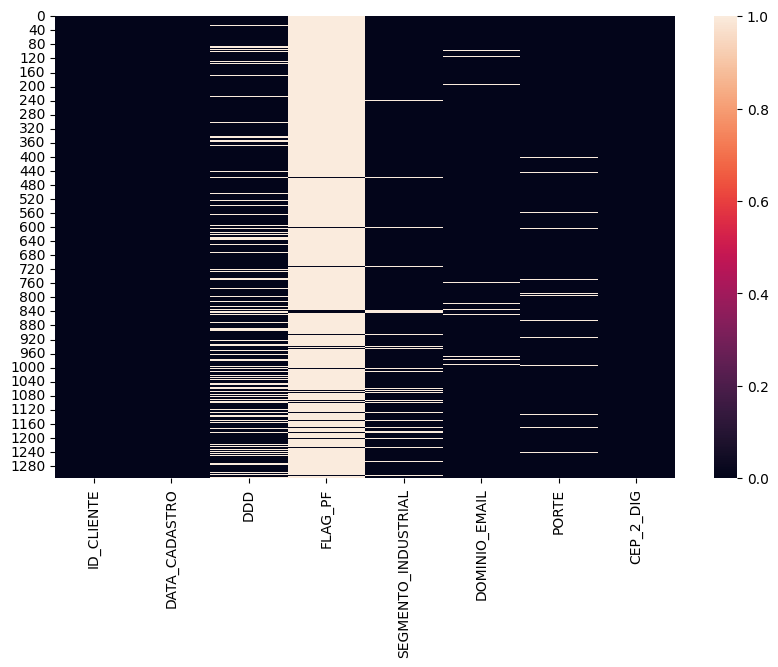

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(base_cadastral_df.isna())

In [7]:
base_info_df

ID_CLIENTE SAFRA_REF  RENDA_MES_ANTERIOR  NO_FUNCIONARIOS
0      1661240395903230676   2018-09             16913.0             92.0
1      8274986328479596038   2018-09            106430.0            141.0
2       345447888460137901   2018-09            707439.0             99.0
3      1003144834589372198   2018-09            239659.0             96.0
4       324916756972236008   2018-09            203123.0            103.0
...                    ...       ...                 ...              ...
24396   705648002974742140   2021-12            278663.0            105.0
24397  4993499380140734678   2021-12            156968.0            140.0
24398  4614484019183480654   2021-12            292698.0            121.0
24399  1299146298565441811   2021-12            106180.0            121.0
24400  4061297388883391410   2021-12            338952.0            127.0

[24401 rows x 4 columns]

In [8]:
base_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24401 entries, 0 to 24400
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_CLIENTE          24401 non-null  int64  
 1   SAFRA_REF           24401 non-null  object 
 2   RENDA_MES_ANTERIOR  24401 non-null  float64
 3   NO_FUNCIONARIOS     24401 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 762.7+ KB


In [9]:
base_pagamentos_df

ID_CLIENTE SAFRA_REF DATA_EMISSAO_DOCUMENTO DATA_PAGAMENTO  \
0      1661240395903230676   2018-08             2018-08-17     2018-09-06   
1      1661240395903230676   2018-08             2018-08-19     2018-09-11   
2      1661240395903230676   2018-08             2018-08-26     2018-09-18   
3      1661240395903230676   2018-08             2018-08-30     2018-10-11   
4      1661240395903230676   2018-08             2018-08-31     2018-09-20   
...                    ...       ...                    ...            ...   
77409  2951563549197799278   2021-06             2021-06-30     2021-07-16   
77410  5220206408301580591   2021-06             2021-06-30     2021-08-16   
77411  5860276371789140450   2021-06             2021-06-30     2021-07-16   
77412  2814790209436551216   2021-06             2021-06-30     2021-07-16   
77413  8343941262792249232   2021-06             2021-06-30     2021-08-16   

      DATA_VENCIMENTO  VALOR_A_PAGAR  TAXA  
0          2018-09-06       35516.41  6.99  
1          2018-09-10       17758.21  6.99  
2          2018-09-17       17431.96  6.99  
3          2018-10-05        1341.00  6.99  
4          2018-09-20       21309.85  6.99  
...               ...            ...   ...  
77409      2021-07-16       89980.00  5.99  
77410      2021-08-16       42239.00  5.99  
77411      2021-07-16       20921.50  5.99  
77412      2021-07-16       90231.05  6.99  
77413      2021-08-16       20736.51  4.99  

[77414 rows x 7 columns]

In [10]:
base_pagamentos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77414 entries, 0 to 77413
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_CLIENTE              77414 non-null  int64  
 1   SAFRA_REF               77414 non-null  object 
 2   DATA_EMISSAO_DOCUMENTO  77414 non-null  object 
 3   DATA_PAGAMENTO          77414 non-null  object 
 4   DATA_VENCIMENTO         77414 non-null  object 
 5   VALOR_A_PAGAR           77414 non-null  float64
 6   TAXA                    77414 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 4.1+ MB


In [11]:
date_columns = ['DATA_EMISSAO_DOCUMENTO', 'DATA_PAGAMENTO', 'DATA_VENCIMENTO']
base_pagamentos_df[date_columns] = base_pagamentos_df[date_columns].apply(pd.to_datetime)

In [12]:
base_teste_df

ID_CLIENTE SAFRA_REF DATA_EMISSAO_DOCUMENTO DATA_VENCIMENTO  \
0      5058298901476893676   2021-07             2021-07-14      2021-08-04   
1       274692171162531764   2021-07             2021-07-08      2021-08-23   
2       274692171162531764   2021-07             2021-07-11      2021-08-25   
3       274692171162531764   2021-07             2021-07-16      2021-08-30   
4       465309249432033993   2021-07             2021-07-05      2021-07-30   
...                    ...       ...                    ...             ...   
12270   705648002974742140   2021-11             2021-11-25      2021-12-13   
12271  4993499380140734678   2021-11             2021-11-25      2021-12-13   
12272  4614484019183480654   2021-11             2021-11-26      2028-09-30   
12273  1299146298565441811   2021-11             2021-11-26      2021-12-13   
12274  4061297388883391410   2021-11             2021-11-28      2021-12-23   

       VALOR_A_PAGAR  TAXA  
0           11204.75  4.99  
1           60718.50  5.99  
2           60718.50  5.99  
3           62250.00  5.99  
4           26593.95  6.99  
...              ...   ...  
12270       47010.00  6.99  
12271      122875.35  8.99  
12272      302200.00  5.99  
12273      143791.85  5.99  
12274       23724.10  4.99  

[12275 rows x 6 columns]

In [13]:
base_teste_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12275 entries, 0 to 12274
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_CLIENTE              12275 non-null  int64  
 1   SAFRA_REF               12275 non-null  object 
 2   DATA_EMISSAO_DOCUMENTO  12275 non-null  object 
 3   DATA_VENCIMENTO         12275 non-null  object 
 4   VALOR_A_PAGAR           12275 non-null  float64
 5   TAXA                    12275 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 575.5+ KB


In [14]:
date_columns = ['DATA_EMISSAO_DOCUMENTO', 'DATA_VENCIMENTO']
base_teste_df[date_columns] = base_teste_df[date_columns].apply(pd.to_datetime)

In [15]:
df_train = base_pagamentos_df.merge(base_info_df, on=['ID_CLIENTE', 'SAFRA_REF'], how='left')
df_train = df_train.merge(base_cadastral_df, on='ID_CLIENTE')
df_train

ID_CLIENTE SAFRA_REF DATA_EMISSAO_DOCUMENTO DATA_PAGAMENTO  \
0      1661240395903230676   2018-08             2018-08-17     2018-09-06   
1      1661240395903230676   2018-08             2018-08-19     2018-09-11   
2      1661240395903230676   2018-08             2018-08-26     2018-09-18   
3      1661240395903230676   2018-08             2018-08-30     2018-10-11   
4      1661240395903230676   2018-08             2018-08-31     2018-09-20   
...                    ...       ...                    ...            ...   
77409  2951563549197799278   2021-06             2021-06-30     2021-07-16   
77410  5220206408301580591   2021-06             2021-06-30     2021-08-16   
77411  5860276371789140450   2021-06             2021-06-30     2021-07-16   
77412  2814790209436551216   2021-06             2021-06-30     2021-07-16   
77413  8343941262792249232   2021-06             2021-06-30     2021-08-16   

      DATA_VENCIMENTO  VALOR_A_PAGAR  TAXA  RENDA_MES_ANTERIOR  \
0          2018-09-06       35516.41  6.99                 NaN   
1          2018-09-10       17758.21  6.99                 NaN   
2          2018-09-17       17431.96  6.99                 NaN   
3          2018-10-05        1341.00  6.99                 NaN   
4          2018-09-20       21309.85  6.99                 NaN   
...               ...            ...   ...                 ...   
77409      2021-07-16       89980.00  5.99            280343.0   
77410      2021-08-16       42239.00  5.99            235315.0   
77411      2021-07-16       20921.50  5.99            100006.0   
77412      2021-07-16       90231.05  6.99                 NaN   
77413      2021-08-16       20736.51  4.99             97599.0   

       NO_FUNCIONARIOS DATA_CADASTRO DDD FLAG_PF SEGMENTO_INDUSTRIAL  \
0                  NaN    2013-08-22  99     NaN            Serviços   
1                  NaN    2013-08-22  99     NaN            Serviços   
2                  NaN    2013-08-22  99     NaN            Serviços   
3                  NaN    2013-08-22  99     NaN            Serviços   
4                  NaN    2013-08-22  99     NaN            Serviços   
...                ...           ...  ..     ...                 ...   
77409            161.0    2000-08-15  11     NaN            Comércio   
77410             87.0    2021-04-08  19     NaN           Indústria   
77411            126.0    2011-02-15  91     NaN            Serviços   
77412              NaN    2021-05-13  (1     NaN            Serviços   
77413            116.0    2019-05-28  11     NaN           Indústria   

      DOMINIO_EMAIL    PORTE CEP_2_DIG  
0             YAHOO  PEQUENO        65  
1             YAHOO  PEQUENO        65  
2             YAHOO  PEQUENO        65  
3             YAHOO  PEQUENO        65  
4             YAHOO  PEQUENO        65  
...             ...      ...       ...  
77409           AOL  PEQUENO        13  
77410         GMAIL   GRANDE        25  
77411       HOTMAIL   GRANDE        67  
77412         YAHOO    MEDIO        14  
77413       HOTMAIL   GRANDE        31  

[77414 rows x 16 columns]

### Tratamento do dado de treino

<Axes: >

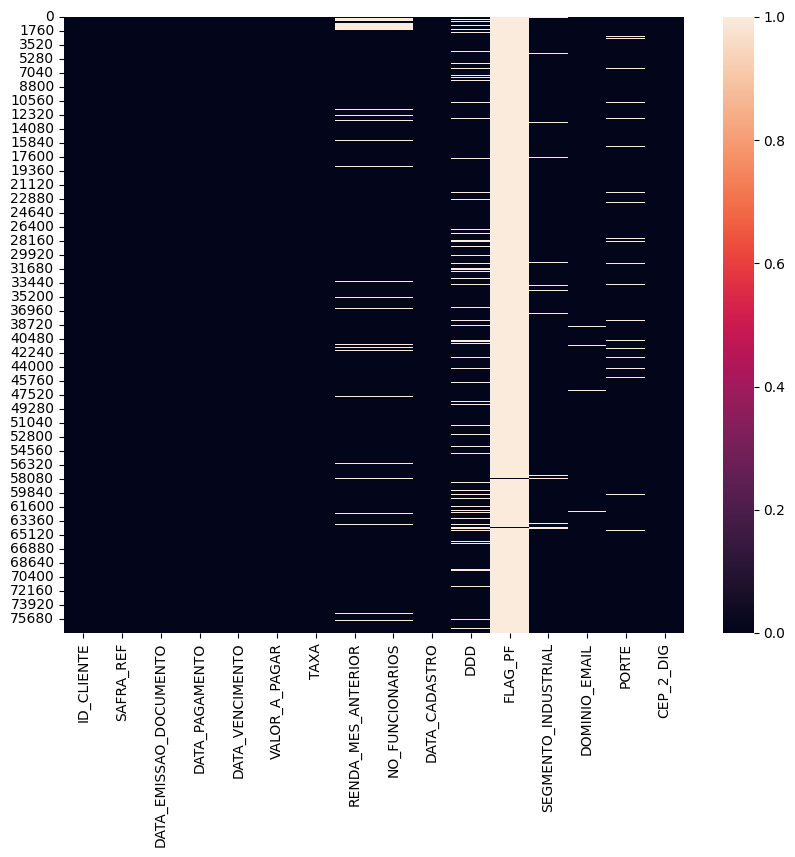

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.isna())

In [17]:
df_train.describe()

ID_CLIENTE         DATA_EMISSAO_DOCUMENTO  \
count  7.741400e+04                          77414   
mean   4.662270e+18  2020-02-02 21:01:42.400082688   
min    8.784237e+15            2018-08-17 00:00:00   
25%    2.369365e+18            2019-05-21 00:00:00   
50%    4.817817e+18            2020-01-27 00:00:00   
75%    6.969349e+18            2020-10-27 00:00:00   
max    9.206031e+18            2021-06-30 00:00:00   
std    2.665719e+18                            NaN   

                      DATA_PAGAMENTO                DATA_VENCIMENTO  \
count                          77414                          77414   
mean   2020-02-26 00:36:28.627380224  2020-02-26 04:43:20.087839232   
min              2018-06-19 00:00:00            2017-11-27 00:00:00   
25%              2019-06-13 00:00:00            2019-06-13 00:00:00   
50%              2020-02-19 00:00:00            2020-02-18 00:00:00   
75%              2020-11-18 00:00:00            2020-11-18 00:00:00   
max              2021-11-24 00:00:00            2027-03-31 00:00:00   
std                              NaN                            NaN   

       VALOR_A_PAGAR          TAXA  RENDA_MES_ANTERIOR  NO_FUNCIONARIOS  \
count   7.741400e+04  77414.000000        7.347700e+04     73477.000000   
mean    4.656546e+04      6.789623        2.909188e+05       117.674170   
min     1.000000e-01      4.990000        1.050000e+02         0.000000   
25%     1.875275e+04      5.990000        1.338140e+05       105.000000   
50%     3.475135e+04      5.990000        2.404700e+05       118.000000   
75%     6.088421e+04      6.990000        3.949130e+05       130.000000   
max     4.400000e+06     11.990000        1.682759e+06       198.000000   
std     4.633892e+04      1.798225        2.129718e+05        18.776952   

                       DATA_CADASTRO  
count                          77414  
mean   2010-04-07 09:47:14.557057024  
min              2000-08-15 00:00:00  
25%              2005-05-05 00:00:00  
50%              2011-02-14 00:00:00  
75%              2014-11-26 00:00:00  
max              2021-06-23 00:00:00  
std                              NaN

#### Tratamento da coluna FLAG_PF

In [18]:
df_train['FLAG_PF'].unique()

array([nan, 'X'], dtype=object)

O valor nulo, correspondente ao cliente com CNPJ ficará como 0 e o valor X, indicando um cliente PF ficará 1 

In [19]:
df_train['FLAG_PF'] = df_train['FLAG_PF'].apply(lambda x: 1 if x == 'X' else 0)

#### Tratamento da coluna SEGMENTO_INDUSTRIAL

In [20]:
df_train['SEGMENTO_INDUSTRIAL'].unique()

array(['Serviços', 'Comércio', 'Indústria', nan], dtype=object)

In [21]:
df_train[df_train['FLAG_PF'] == 1]['SEGMENTO_INDUSTRIAL'].unique()

array([nan], dtype=object)

Preenchimento dos valores nulos onde FLAG_PF é 1

In [22]:
df_train.loc[df_train['FLAG_PF'] == 1, 'SEGMENTO_INDUSTRIAL'] = 'PESSOA_FISICA'

Preenchimento do restante dos valores nulos

In [23]:
df_train[df_train['SEGMENTO_INDUSTRIAL'].isna()]

ID_CLIENTE SAFRA_REF DATA_EMISSAO_DOCUMENTO DATA_PAGAMENTO  \
55     3118152790263512426   2018-08             2018-08-17     2018-09-10   
56     3118152790263512426   2018-08             2018-08-17     2018-09-10   
57     3118152790263512426   2018-08             2018-08-18     2018-09-11   
58     3118152790263512426   2018-08             2018-08-22     2018-09-13   
59     3118152790263512426   2018-08             2018-08-23     2018-09-14   
...                    ...       ...                    ...            ...   
77080  7215093571368368138   2021-06             2021-06-24     2021-07-23   
77081  7215093571368368138   2021-06             2021-06-25     2021-07-26   
77082  7215093571368368138   2021-06             2021-06-25     2021-07-30   
77198  7810985951121711480   2021-06             2021-06-23     2021-07-13   
77286  7818340804682162328   2021-06             2021-06-24     2021-07-10   

      DATA_VENCIMENTO  VALOR_A_PAGAR   TAXA  RENDA_MES_ANTERIOR  \
55         2018-09-10       14993.27   5.99                 NaN   
56         2018-09-10       24066.07   5.99                 NaN   
57         2018-09-11       23563.07   5.99                 NaN   
58         2018-09-13       23764.37   5.99                 NaN   
59         2018-09-14       13609.54   5.99                 NaN   
...               ...            ...    ...                 ...   
77080      2021-07-13       28221.32   4.99            216636.0   
77081      2021-07-13       20974.45   4.99            216636.0   
77082      2021-07-14       28221.32   4.99            216636.0   
77198      2021-07-13       18870.00  11.99                 NaN   
77286      2021-07-12       58827.60   6.99            488409.0   

       NO_FUNCIONARIOS DATA_CADASTRO DDD  FLAG_PF SEGMENTO_INDUSTRIAL  \
55                 NaN    2000-08-15  21        0                 NaN   
56                 NaN    2000-08-15  21        0                 NaN   
57                 NaN    2000-08-15  21        0                 NaN   
58                 NaN    2000-08-15  21        0                 NaN   
59                 NaN    2000-08-15  21        0                 NaN   
...                ...           ...  ..      ...                 ...   
77080            125.0    2000-08-15  32        0                 NaN   
77081            125.0    2000-08-15  32        0                 NaN   
77082            125.0    2000-08-15  32        0                 NaN   
77198              NaN    2011-02-14  11        0                 NaN   
77286            119.0    2011-02-14  21        0                 NaN   

      DOMINIO_EMAIL   PORTE CEP_2_DIG  
55          OUTLOOK   MEDIO        22  
56          OUTLOOK   MEDIO        22  
57          OUTLOOK   MEDIO        22  
58          OUTLOOK   MEDIO        22  
59          OUTLOOK   MEDIO        22  
...             ...     ...       ...  
77080         YAHOO  GRANDE        36  
77081         YAHOO  GRANDE        36  
77082         YAHOO  GRANDE        36  
77198           AOL   MEDIO        33  
77286       HOTMAIL   MEDIO        26  

[1198 rows x 16 columns]

In [24]:
df_train.fillna({"SEGMENTO_INDUSTRIAL": "OUTRO"}, inplace=True)

Aplicação do One Hot Encoder na coluna desconsiderando as classe PESSOA_FISICA e OUTRO <br>
Com relação à classe PESSOA_FISICA, já existe uma coluna equivalente, FLAG_PF <br>
Para a classe OUTRO, a informação seria desnecessária, pois quando todas as colunas forem zeradas, a classe correspondente seria OUTRO

In [25]:
ohe_segmento = OneHotEncoder(sparse_output=False)
ohe_segmento_array = ohe_segmento.fit_transform(df_train[['SEGMENTO_INDUSTRIAL']])
ohe_df = pd.DataFrame(ohe_segmento_array, columns=ohe_segmento.get_feature_names_out(['SEGMENTO_INDUSTRIAL']))
ohe_df.drop(columns=['SEGMENTO_INDUSTRIAL_PESSOA_FISICA', 'SEGMENTO_INDUSTRIAL_OUTRO'], inplace=True)
ohe_df

SEGMENTO_INDUSTRIAL_Comércio  SEGMENTO_INDUSTRIAL_Indústria  \
0                               0.0                            0.0   
1                               0.0                            0.0   
2                               0.0                            0.0   
3                               0.0                            0.0   
4                               0.0                            0.0   
...                             ...                            ...   
77409                           1.0                            0.0   
77410                           0.0                            1.0   
77411                           0.0                            0.0   
77412                           0.0                            0.0   
77413                           0.0                            1.0   

       SEGMENTO_INDUSTRIAL_Serviços  
0                               1.0  
1                               1.0  
2                               1.0  
3                               1.0  
4                               1.0  
...                             ...  
77409                           0.0  
77410                           0.0  
77411                           1.0  
77412                           1.0  
77413                           0.0  

[77414 rows x 3 columns]

In [26]:
df_train = pd.concat([df_train, ohe_df], axis=1).drop(columns='SEGMENTO_INDUSTRIAL')
df_train

ID_CLIENTE SAFRA_REF DATA_EMISSAO_DOCUMENTO DATA_PAGAMENTO  \
0      1661240395903230676   2018-08             2018-08-17     2018-09-06   
1      1661240395903230676   2018-08             2018-08-19     2018-09-11   
2      1661240395903230676   2018-08             2018-08-26     2018-09-18   
3      1661240395903230676   2018-08             2018-08-30     2018-10-11   
4      1661240395903230676   2018-08             2018-08-31     2018-09-20   
...                    ...       ...                    ...            ...   
77409  2951563549197799278   2021-06             2021-06-30     2021-07-16   
77410  5220206408301580591   2021-06             2021-06-30     2021-08-16   
77411  5860276371789140450   2021-06             2021-06-30     2021-07-16   
77412  2814790209436551216   2021-06             2021-06-30     2021-07-16   
77413  8343941262792249232   2021-06             2021-06-30     2021-08-16   

      DATA_VENCIMENTO  VALOR_A_PAGAR  TAXA  RENDA_MES_ANTERIOR  \
0          2018-09-06       35516.41  6.99                 NaN   
1          2018-09-10       17758.21  6.99                 NaN   
2          2018-09-17       17431.96  6.99                 NaN   
3          2018-10-05        1341.00  6.99                 NaN   
4          2018-09-20       21309.85  6.99                 NaN   
...               ...            ...   ...                 ...   
77409      2021-07-16       89980.00  5.99            280343.0   
77410      2021-08-16       42239.00  5.99            235315.0   
77411      2021-07-16       20921.50  5.99            100006.0   
77412      2021-07-16       90231.05  6.99                 NaN   
77413      2021-08-16       20736.51  4.99             97599.0   

       NO_FUNCIONARIOS DATA_CADASTRO DDD  FLAG_PF DOMINIO_EMAIL    PORTE  \
0                  NaN    2013-08-22  99        0         YAHOO  PEQUENO   
1                  NaN    2013-08-22  99        0         YAHOO  PEQUENO   
2                  NaN    2013-08-22  99        0         YAHOO  PEQUENO   
3                  NaN    2013-08-22  99        0         YAHOO  PEQUENO   
4                  NaN    2013-08-22  99        0         YAHOO  PEQUENO   
...                ...           ...  ..      ...           ...      ...   
77409            161.0    2000-08-15  11        0           AOL  PEQUENO   
77410             87.0    2021-04-08  19        0         GMAIL   GRANDE   
77411            126.0    2011-02-15  91        0       HOTMAIL   GRANDE   
77412              NaN    2021-05-13  (1        0         YAHOO    MEDIO   
77413            116.0    2019-05-28  11        0       HOTMAIL   GRANDE   

      CEP_2_DIG  SEGMENTO_INDUSTRIAL_Comércio  SEGMENTO_INDUSTRIAL_Indústria  \
0            65                           0.0                            0.0   
1            65                           0.0                            0.0   
2            65                           0.0                            0.0   
3            65                           0.0                            0.0   
4            65                           0.0                            0.0   
...         ...                           ...                            ...   
77409        13                           1.0                            0.0   
77410        25                           0.0                            1.0   
77411        67                           0.0                            0.0   
77412        14                           0.0                            0.0   
77413        31                           0.0                            1.0   

       SEGMENTO_INDUSTRIAL_Serviços  
0                               1.0  
1                               1.0  
2                               1.0  
3                               1.0  
4                               1.0  
...                             ...  
77409                           0.0  
77410                           0.0  
77411                           1.0  
77412                           

#### Tratamento da coluna PORTE

In [27]:
df_train['PORTE'].unique()

array(['PEQUENO', 'MEDIO', 'GRANDE', nan], dtype=object)

In [28]:
df_train.fillna({"PORTE": "INDISPONIVEL"}, inplace=True)

In [29]:
oe_porte = OrdinalEncoder(categories=[['INDISPONIVEL', 'PEQUENO', 'MEDIO', 'GRANDE']])
df_train['PORTE'] = oe_porte.fit_transform(df_train[['PORTE']]).reshape(1, -1)[0]
df_train

ID_CLIENTE SAFRA_REF DATA_EMISSAO_DOCUMENTO DATA_PAGAMENTO  \
0      1661240395903230676   2018-08             2018-08-17     2018-09-06   
1      1661240395903230676   2018-08             2018-08-19     2018-09-11   
2      1661240395903230676   2018-08             2018-08-26     2018-09-18   
3      1661240395903230676   2018-08             2018-08-30     2018-10-11   
4      1661240395903230676   2018-08             2018-08-31     2018-09-20   
...                    ...       ...                    ...            ...   
77409  2951563549197799278   2021-06             2021-06-30     2021-07-16   
77410  5220206408301580591   2021-06             2021-06-30     2021-08-16   
77411  5860276371789140450   2021-06             2021-06-30     2021-07-16   
77412  2814790209436551216   2021-06             2021-06-30     2021-07-16   
77413  8343941262792249232   2021-06             2021-06-30     2021-08-16   

      DATA_VENCIMENTO  VALOR_A_PAGAR  TAXA  RENDA_MES_ANTERIOR  \
0          2018-09-06       35516.41  6.99                 NaN   
1          2018-09-10       17758.21  6.99                 NaN   
2          2018-09-17       17431.96  6.99                 NaN   
3          2018-10-05        1341.00  6.99                 NaN   
4          2018-09-20       21309.85  6.99                 NaN   
...               ...            ...   ...                 ...   
77409      2021-07-16       89980.00  5.99            280343.0   
77410      2021-08-16       42239.00  5.99            235315.0   
77411      2021-07-16       20921.50  5.99            100006.0   
77412      2021-07-16       90231.05  6.99                 NaN   
77413      2021-08-16       20736.51  4.99             97599.0   

       NO_FUNCIONARIOS DATA_CADASTRO DDD  FLAG_PF DOMINIO_EMAIL  PORTE  \
0                  NaN    2013-08-22  99        0         YAHOO    1.0   
1                  NaN    2013-08-22  99        0         YAHOO    1.0   
2                  NaN    2013-08-22  99        0         YAHOO    1.0   
3                  NaN    2013-08-22  99        0         YAHOO    1.0   
4                  NaN    2013-08-22  99        0         YAHOO    1.0   
...                ...           ...  ..      ...           ...    ...   
77409            161.0    2000-08-15  11        0           AOL    1.0   
77410             87.0    2021-04-08  19        0         GMAIL    3.0   
77411            126.0    2011-02-15  91        0       HOTMAIL    3.0   
77412              NaN    2021-05-13  (1        0         YAHOO    2.0   
77413            116.0    2019-05-28  11        0       HOTMAIL    3.0   

      CEP_2_DIG  SEGMENTO_INDUSTRIAL_Comércio  SEGMENTO_INDUSTRIAL_Indústria  \
0            65                           0.0                            0.0   
1            65                           0.0                            0.0   
2            65                           0.0                            0.0   
3            65                           0.0                            0.0   
4            65                           0.0                            0.0   
...         ...                           ...                            ...   
77409        13                           1.0                            0.0   
77410        25                           0.0                            1.0   
77411        67                           0.0                            0.0   
77412        14                           0.0                            0.0   
77413        31                           0.0                            1.0   

       SEGMENTO_INDUSTRIAL_Serviços  
0                               1.0  
1                               1.0  
2                               1.0  
3                               1.0  
4                               1.0  
...                             ...  
77409                           0.0  
77410                           0.0  
77411                           1.0  
77412                           1.0  
77413             

#### Tratamento das colunas RENDA_MES_ANTERIOR e NO_FUNCIONARIOS
Foi usada a mediana dos registros de cada cliente

In [30]:
def fill_info(df_client):
    if df_client['NO_FUNCIONARIOS'].isna().any() or df_client['RENDA_MES_ANTERIOR'].isna().any():
        median_no_funcionarios = df_client['NO_FUNCIONARIOS'].median()
        median_renda_mes_anterior = df_client['RENDA_MES_ANTERIOR'].median()
        df_client.fillna({'NO_FUNCIONARIOS': median_no_funcionarios, 'RENDA_MES_ANTERIOR': median_renda_mes_anterior}, inplace=True)
        
    return df_client
        
df_train = df_train.groupby(by='ID_CLIENTE').apply(fill_info).reset_index(drop=True)
df_train

/home/daniel/miniconda3/envs/datarisk/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/daniel/miniconda3/envs/datarisk/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/daniel/miniconda3/envs/datarisk/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/daniel/miniconda3/envs/datarisk/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/daniel/miniconda3/envs/datarisk/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/dani

ID_CLIENTE SAFRA_REF DATA_EMISSAO_DOCUMENTO DATA_PAGAMENTO  \
0         8784237149961904   2018-08             2018-08-17     2018-09-04   
1         8784237149961904   2018-08             2018-08-22     2018-09-11   
2         8784237149961904   2018-08             2018-08-23     2018-09-10   
3         8784237149961904   2018-08             2018-08-23     2018-09-08   
4         8784237149961904   2018-08             2018-08-24     2018-09-11   
...                    ...       ...                    ...            ...   
77409  9206030810342980458   2021-05             2021-05-16     2021-06-01   
77410  9206030810342980458   2021-05             2021-05-23     2021-06-08   
77411  9206030810342980458   2021-06             2021-06-16     2021-07-02   
77412  9206030810342980458   2021-06             2021-06-18     2021-07-05   
77413  9206030810342980458   2021-06             2021-06-24     2021-07-12   

      DATA_VENCIMENTO  VALOR_A_PAGAR   TAXA  RENDA_MES_ANTERIOR  \
0          2018-09-04      100616.10   5.99            243395.0   
1          2018-09-11       89552.80   5.99            243395.0   
2          2018-09-10       94062.80   5.99            243395.0   
3          2018-09-10      102686.10   5.99            243395.0   
4          2018-09-11       51393.00   5.99            243395.0   
...               ...            ...    ...                 ...   
77409      2021-06-01      107321.36  11.99            256133.0   
77410      2021-06-08       38372.91   5.99            256133.0   
77411      2021-07-02       43030.50   5.99            463963.0   
77412      2021-07-05      107318.81   5.99            463963.0   
77413      2021-07-12       50454.20   5.99            463963.0   

       NO_FUNCIONARIOS DATA_CADASTRO DDD  FLAG_PF DOMINIO_EMAIL  PORTE  \
0                110.0    2011-02-14  11        0       HOTMAIL    1.0   
1                110.0    2011-02-14  11        0       HOTMAIL    1.0   
2                110.0    2011-02-14  11        0       HOTMAIL    1.0   
3                110.0    2011-02-14  11        0       HOTMAIL    1.0   
4                110.0    2011-02-14  11        0       HOTMAIL    1.0   
...                ...           ...  ..      ...           ...    ...   
77409            109.0    2005-08-08  11        0       HOTMAIL    2.0   
77410            109.0    2005-08-08  11        0       HOTMAIL    2.0   
77411            105.0    2005-08-08  11        0       HOTMAIL    2.0   
77412            105.0    2005-08-08  11        0       HOTMAIL    2.0   
77413            105.0    2005-08-08  11        0       HOTMAIL    2.0   

      CEP_2_DIG  SEGMENTO_INDUSTRIAL_Comércio  SEGMENTO_INDUSTRIAL_Indústria  \
0            27                           1.0                            0.0   
1            27                           1.0                            0.0   
2            27                           1.0                            0.0   
3            27                           1.0                            0.0   
4            27                           1.0                            0.0   
...         ...                           ...                            ...   
77409        91                           0.0                            0.0   
77410        91                           0.0                            0.0   
77411        91                           0.0                            0.0   
77412        91                           0.0                            0.0   
77413        91                           0.0                            0.0   

       SEGMENTO_INDUSTRIAL_Serviços  
0                               0.0  
1                               0.0  
2                               0.0  
3                               0.0  
4                               0.0  
...                             ...  
77409                           1.0  
77410                           1.0  
77411                           1.0  
77412                           1.0  
77413 

Quando o cliente é pessoa física(FLAG_PF = 1), a quantidade de funcionários é 0, então quando NO_FUNCIONARIOS for nulo quando FLAG_PF = 1, NO_FUNCIONARIOS é 0

In [31]:
df_train[df_train['FLAG_PF'] == 1]['NO_FUNCIONARIOS'].describe()

count    212.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: NO_FUNCIONARIOS, dtype: float64

In [32]:
df_train.loc[df_train['FLAG_PF'] == 1, 'NO_FUNCIONARIOS'] = 0

In [33]:
df_train[df_train['NO_FUNCIONARIOS'].isna()]

ID_CLIENTE SAFRA_REF DATA_EMISSAO_DOCUMENTO DATA_PAGAMENTO  \
1747    255928150711119413   2019-12             2019-12-28     2020-01-27   
1748    255928150711119413   2020-11             2020-11-30     2021-01-05   
2108    280557491372818982   2020-11             2020-11-23     2020-12-18   
2983    353597552829913556   2020-08             2020-08-18     2020-09-21   
2984    353597552829913556   2020-11             2020-11-22     2021-01-27   
...                    ...       ...                    ...            ...   
70511  8305404138704642088   2021-01             2021-01-28     2021-03-01   
71468  8418046305741705080   2020-09             2020-09-23     2020-10-26   
71853  8503883917639127781   2021-05             2021-05-31     2021-06-22   
72249  8512418270673092441   2019-09             2019-09-30     2019-10-24   
73558  8619312279454356821   2020-04             2020-04-23     2020-05-19   

      DATA_VENCIMENTO  VALOR_A_PAGAR  TAXA  RENDA_MES_ANTERIOR  \
1747       2020-01-22        3588.55  6.99                 NaN   
1748       2021-01-05        1743.18  5.99                 NaN   
2108       2020-12-18        2743.31  6.99                 NaN   
2983       2020-09-14        4172.07  5.99                 NaN   
2984       2020-12-17        2788.29  5.99                 NaN   
...               ...            ...   ...                 ...   
70511      2021-03-01        3045.00  5.99                 NaN   
71468      2020-11-05      100605.00  5.99                 NaN   
71853      2021-06-22       58500.00  6.99                 NaN   
72249      2019-10-25       52717.50  5.99                 NaN   
73558      2020-05-18         977.96  5.99                 NaN   

       NO_FUNCIONARIOS DATA_CADASTRO  DDD  FLAG_PF DOMINIO_EMAIL  PORTE  \
1747               NaN    2006-05-03   49        0         YAHOO    3.0   
1748               NaN    2006-05-03   49        0         YAHOO    3.0   
2108               NaN    2015-04-15   17        0         YAHOO    1.0   
2983               NaN    2020-03-02   47        0         YAHOO    3.0   
2984               NaN    2020-03-02   47        0         YAHOO    3.0   
...                ...           ...  ...      ...           ...    ...   
70511              NaN    2011-09-27   62        0         GMAIL    3.0   
71468              NaN    2019-10-28  NaN        0       HOTMAIL    1.0   
71853              NaN    2009-01-29   19        0         YAHOO    1.0   
72249              NaN    2019-08-28  NaN        0           AOL    2.0   
73558              NaN    2014-05-18   16        0         GMAIL    3.0   

      CEP_2_DIG  SEGMENTO_INDUSTRIAL_Comércio  SEGMENTO_INDUSTRIAL_Indústria  \
1747         89                           1.0                            0.0   
1748         89                           1.0                            0.0   
2108         15                           0.0                            0.0   
2983         88                           0.0                            1.0   
2984         88                           0.0                            1.0   
...         ...                           ...                            ...   
70511        74                           0.0                            1.0   
71468        64                           0.0                            0.0   
71853        13                           1.0                            0.0   
72249        73                           1.0                            0.0   
73558        39                           0.0                            1.0   

       SEGMENTO_INDUSTRIAL_Serviços  
1747                            0.0  
1748                            0.0  
2108                            1.0  
2983                            0.0  
2984                            0.0  
...                             ...  
70511                           0.0  
71468                           1.0  
71853                           0.0  
72249                           0.0  
73558 

In [34]:
df_train.fillna({'RENDA_MES_ANTERIOR': df_train['RENDA_MES_ANTERIOR'].median(), 'NO_FUNCIONARIOS': df_train['NO_FUNCIONARIOS'].median()}, inplace=True)

#### Tratando coluna DATA_EMISSAO_DOCUMENTO

In [35]:
df_train[df_train['DATA_EMISSAO_DOCUMENTO'] > df_train['DATA_VENCIMENTO']]

ID_CLIENTE SAFRA_REF DATA_EMISSAO_DOCUMENTO DATA_PAGAMENTO  \
4808    531805620371082364   2021-02             2021-02-01     2021-02-11   
4809    531805620371082364   2021-02             2021-02-04     2021-02-19   
4810    531805620371082364   2021-02             2021-02-04     2021-02-22   
5211    660382477567765256   2019-05             2019-05-13     2019-06-06   
5212    660382477567765256   2019-05             2019-05-13     2019-04-23   
10344  1118514612547157551   2018-09             2018-09-02     2018-09-19   
10345  1118514612547157551   2018-09             2018-09-02     2018-09-18   
10346  1118514612547157551   2018-09             2018-09-02     2018-09-19   
13734  1454789421854453615   2020-03             2020-03-30     2020-05-15   
16255  1977574645216036803   2018-09             2018-09-13     2018-09-28   
35051  4442205629227031623   2019-03             2019-03-24     2019-06-12   
35052  4442205629227031623   2019-03             2019-03-24     2019-06-14   
40714  5043004928991692540   2019-10             2019-10-13     2020-10-29   
44920  5503073374822479037   2021-03             2021-03-06     2021-09-14   
45437  5558533999208199371   2020-12             2020-12-03     2020-12-23   
45438  5558533999208199371   2020-12             2020-12-03     2020-12-09   
45439  5558533999208199371   2020-12             2020-12-03     2020-12-23   
50898  6020593949794792044   2018-11             2018-11-06     2021-03-23   
54595  6693181132429641622   2020-01             2020-01-05     2019-12-26   
58604  7031913170099381454   2020-01             2020-01-26     2019-12-30   
58605  7031913170099381454   2020-01             2020-01-26     2020-03-04   
58606  7031913170099381454   2020-01             2020-01-26     2020-01-25   
58732  7061868716439556791   2021-06             2021-06-14     2021-09-24   
67761  8047821974672655407   2019-08             2019-08-12     2019-06-11   
69422  8198518259946944874   2018-10             2018-10-12     2019-05-22   
69425  8198518259946944874   2018-11             2018-11-13     2018-06-19   
70781  8348574220426911086   2019-01             2019-01-03     2019-01-16   

      DATA_VENCIMENTO  VALOR_A_PAGAR  TAXA  RENDA_MES_ANTERIOR  \
4808       2021-01-20       31044.74  5.99            192040.0   
4809       2021-01-31       50000.00  5.99            192040.0   
4810       2021-01-31       32610.00  5.99            192040.0   
5211       2019-01-23       52329.33  4.99             59770.0   
5212       2019-01-23      600000.00  4.99             59770.0   
10344      2018-08-27       58434.08  6.99             70472.0   
10345      2018-06-20       50000.00  6.99             70472.0   
10346      2018-07-25       58434.08  6.99             70472.0   
13734      2019-07-18       31867.87  6.99            327770.0   
16255      2018-08-31       46674.40  5.99            553341.0   
35051      2018-12-07      100000.00  5.99            240502.0   
35052      2018-12-07       63000.00  5.99            240502.0   
40714      2019-09-25        8299.78  8.99             90887.0   
44920      2020-08-31      800000.00  6.99            575492.0   
45437      2020-11-25      102424.40  5.99             80919.0   
45438      2020-11-25      103559.44  5.99             80919.0   
45439      2020-11-25      102187.11  5.99             80919.0   
50898      2018-11-05      278657.56  6.99            450205.0   
54595      2019-12-26       88000.00  4.99             12843.0   
58604      2019-11-25       19762.60  4.99            321729.0   
58605      2019-12-25       18513.21  4.99            321729.0   
58606      2019-12-25       19762.60  4.99            321729.0   
58732      2020-04-20        2677.12  6.99             76721.0   
67761      2019-06-06      500000.00  6.99             15969.0   
69422      2017-11-27       11878.82  4.99            210562.0   
69425      2017-12-28         255.43  6.99            217032.0   
70781      2018-12-17       10000.00  6.99       

Existem registros onde a data de vencimento é anterior ou igual à data de emissão do documento. Então para esses casos, substituí a data de vencimento pela data de emissão acrescida da mediana do prazo de vencimento. Em seguida, refiz o calculo de prazo para a coluna já criada.

In [36]:
df_train['DATA_VENCIMENTO'] = df_train.apply(lambda row: row['DATA_EMISSAO_DOCUMENTO'] + pd.to_timedelta(18, unit='d') 
                                                                             if row['DATA_EMISSAO_DOCUMENTO'] >= row['DATA_VENCIMENTO'] 
                                                                             else row['DATA_VENCIMENTO'], axis=1)

days_to_pay = (df_train['DATA_VENCIMENTO'] - df_train['DATA_EMISSAO_DOCUMENTO'])
days_to_pay.describe()

count                         77414
mean     23 days 08:34:23.998759914
std      25 days 23:17:56.846483089
min                 1 days 00:00:00
25%                16 days 00:00:00
50%                18 days 00:00:00
75%                24 days 00:00:00
max              2677 days 00:00:00
dtype: object

<Axes: ylabel='PRAZO_PAGAMENTO'>

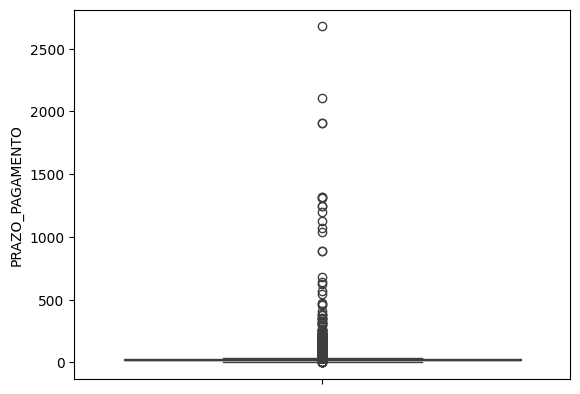

In [37]:
base_pagamentos_df['PRAZO_PAGAMENTO'] = days_to_pay.dt.days
sns.boxplot(base_pagamentos_df['PRAZO_PAGAMENTO'])

In [38]:
base_pagamentos_df[base_pagamentos_df['PRAZO_PAGAMENTO'] > 500]

ID_CLIENTE SAFRA_REF DATA_EMISSAO_DOCUMENTO DATA_PAGAMENTO  \
254    1192891347324061812   2018-09             2018-09-11     2018-09-27   
9896   5522764880180045081   2018-12             2018-12-31     2019-01-17   
10662  4972567100282306577   2019-01             2019-01-17     2019-02-11   
13347  4489904752023469353   2019-03             2019-03-04     2019-03-27   
20225   170089315547146305   2019-05             2019-05-26     2019-06-11   
25953  3977861004707764824   2019-08             2019-08-18     2019-09-03   
29930  7436628409157313756   2019-10             2019-10-10     2019-11-18   
35273  9206030810342980458   2019-12             2019-12-16     2020-01-02   
36531  5176940320835464459   2020-01             2020-01-05     2020-01-22   
38878  2493305884832539159   2020-02             2020-02-03     2020-06-26   
38879  2493305884832539159   2020-02             2020-02-03     2020-06-26   
43932  5999145415800242177   2020-04             2020-04-02     2020-04-20   
55278  2397171153213063761   2020-10             2020-10-16     2020-11-03   
55279  4347826483121154490   2020-09             2020-09-17     2020-10-05   
58110  7920896580423665241   2020-11             2020-11-08     2020-11-24   
71975   968199235777440720   2021-04             2021-04-19     2021-05-11   
72643  5752688018135006198   2021-05             2021-05-16     2021-06-14   
72644   410843023337872279   2021-04             2021-04-21     2021-05-07   
74297   226405871752897670   2021-05             2021-05-18     2021-06-04   
74298  8716163053080758848   2021-05             2021-05-18     2021-06-04   

      DATA_VENCIMENTO  VALOR_A_PAGAR   TAXA  PRAZO_PAGAMENTO  
254        2018-09-27       20495.00   4.99             1040  
9896       2019-01-17       28029.83   5.99             2107  
10662      2019-02-11       47615.85   6.99             1313  
13347      2019-03-26       25794.10   5.99             1069  
20225      2019-06-11       11944.50   6.99              682  
25953      2019-09-03       19235.70   4.99             1198  
29930      2019-11-11         360.00  11.99             2677  
35273      2020-01-02       33068.30  11.99              624  
36531      2020-01-22       20450.00   8.99             1124  
38878      2020-03-05         361.79   4.99              886  
38879      2020-03-05        1327.85   4.99              886  
43932      2020-04-20       51363.00   5.99              572  
55278      2020-11-03       32113.10   5.99             1244  
55279      2020-10-05       37283.88   6.99             1244  
58110      2020-11-24       88712.00   6.99              640  
71975      2021-05-11      169512.08   8.99              547  
72643      2021-06-10         999.00  11.99             1318  
72644      2021-05-10      128216.80   4.99             1318  
74297      2021-06-04       26528.00   6.99             1911  
74298      2021-06-04       58551.00   6.99             1911

### Feature Engineering

Criação de feature de prazo em dias da emissão do documento até o vencimento

In [39]:
days_to_pay = (df_train['DATA_VENCIMENTO'] - df_train['DATA_EMISSAO_DOCUMENTO'])
days_to_pay.describe()

count                         77414
mean     23 days 08:34:23.998759914
std      25 days 23:17:56.846483089
min                 1 days 00:00:00
25%                16 days 00:00:00
50%                18 days 00:00:00
75%                24 days 00:00:00
max              2677 days 00:00:00
dtype: object

<Axes: ylabel='PRAZO_PAGAMENTO'>

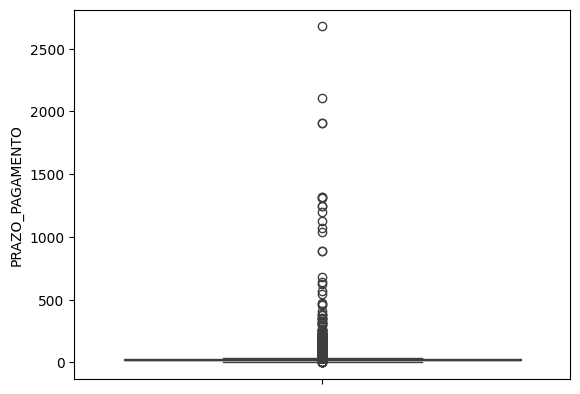

In [40]:
df_train['PRAZO_PAGAMENTO'] = days_to_pay.dt.days
sns.boxplot(df_train['PRAZO_PAGAMENTO'])

Criação de feature de dias em dias da emissão do documento até o vencimento (para extração da feature de inadiplencia)

In [41]:
timeout_days = (df_train['DATA_PAGAMENTO'] - df_train['DATA_VENCIMENTO'])
timeout_days.describe()

count                          77414
mean     -1 days +19:00:22.228537474
std       25 days 00:02:43.686732429
min             -2661 days +00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                  0 days 00:00:00
max                850 days 00:00:00
dtype: object

<Axes: >

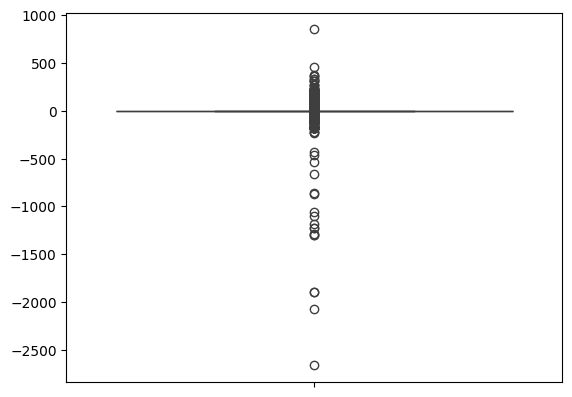

In [42]:
timeout_days = timeout_days.dt.days
sns.boxplot(timeout_days)

In [43]:
df_train[timeout_days < -500]

ID_CLIENTE SAFRA_REF DATA_EMISSAO_DOCUMENTO DATA_PAGAMENTO  \
9896   1097345589386012260   2019-11             2019-11-20     2019-12-27   
10662  1118514612547157551   2019-12             2019-12-29     2020-01-27   
13347  1366416810235233769   2019-03             2019-03-27     2019-04-11   
20225  2451708306555441014   2018-09             2018-09-20     2018-10-08   
25953  3204108603682323936   2020-08             2020-08-19     2020-09-03   
29930  3829967475074118757   2019-12             2019-12-01     2019-12-17   
36531  4593070249039532001   2018-10             2018-10-03     2018-10-22   
38878  4820852183212661131   2019-08             2019-08-29     2019-09-13   
38879  4820852183212661131   2019-08             2019-08-29     2019-09-24   
55278  6784879562354696650   2021-02             2021-02-02     2021-02-17   
55279  6784879562354696650   2021-02             2021-02-02     2021-02-22   
71975  8505870778358741102   2021-05             2021-05-02     2021-05-17   
72643  8535586342375301953   2021-03             2021-03-23     2021-04-13   
72644  8535586342375301953   2021-03             2021-03-23     2021-04-07   
74297  8724731934863284019   2018-11             2018-11-04     2018-11-19   
74298  8724731934863284019   2018-11             2018-11-04     2018-11-19   

      DATA_VENCIMENTO  VALOR_A_PAGAR   TAXA  RENDA_MES_ANTERIOR  \
9896       2025-08-27      659850.00   5.99            134947.0   
10662      2023-08-03      401400.00   5.99            342370.0   
13347      2022-02-28     1391835.20   6.99            540946.0   
20225      2020-08-02      250000.00  11.99            546961.0   
25953      2023-11-30      140000.00   5.99             79093.0   
29930      2027-03-31      194329.49   5.99            207561.0   
36531      2021-10-31      100000.00  11.99            574343.0   
38878      2022-01-31      318000.00   5.99            716915.0   
38879      2022-01-31       15900.00   5.99            716915.0   
55278      2024-06-30     1000000.00   5.99            693984.0   
55279      2024-06-30      628200.00   5.99            693984.0   
71975      2022-10-31      182240.00   5.99            657493.0   
72643      2024-10-31      483816.00  11.99            315577.0   
72644      2024-10-31      180000.00  11.99            315577.0   
74297      2024-01-28      150000.00   6.99            178799.0   
74298      2024-01-28       40000.00   6.99            178799.0   

       NO_FUNCIONARIOS DATA_CADASTRO  DDD  FLAG_PF DOMINIO_EMAIL  PORTE  \
9896             108.0    2018-08-22  NaN        0         YAHOO    2.0   
10662             94.0    2013-10-31   65        0         YAHOO    1.0   
13347             96.0    2000-08-15   19        0         YAHOO    3.0   
20225             79.0    2000-08-15   41        0         YAHOO    2.0   
25953             98.0    2015-08-20   31        0         GMAIL    2.0   
29930            130.0    2007-03-19  NaN        0         YAHOO    3.0   
36531             80.0    2000-08-15   11        0         GMAIL    1.0   
38878             84.0    2011-02-14   47        0       HOTMAIL    3.0   
38879             84.0    2011-02-14   47        0       HOTMAIL    3.0   
55278            149.0    2000-08-15   45        0         YAHOO    2.0   
55279            149.0    2000-08-15   45        0         YAHOO    2.0   
71975            122.0    2011-02-14   98        0         GMAIL    3.0   
72643            130.0    2017-11-07   32        0         YAHOO    2.0   
72644            130.0    2017-11-07   32        0         YAHOO    2.0   
74297            110.0    2000-08-15   85        0       HOTMAIL    1.0   
74298            110.0    2000-08-15   85        0       HOTMAIL    1.0   

      CEP_2_DIG  SEGMENTO_INDUSTRIAL_Comércio  SEGMENTO_INDUSTRIAL_Indústria  \
9896         11                           1.0                            0.0   
10662        78                           0.0                            0.0   
13347        13                  

Criação da feature alvo inadiplencia

In [44]:
df_train['INADIPLENCIA'] = timeout_days.apply(lambda x: 1 if x >= 5 else 0)

remoção das colunas de data e da feature de dias para o vencimento

Feature de renda média por funcionário

In [45]:
df_train["RENDA_FUNCIONARIO"] = df_train.apply(lambda row: row["RENDA_MES_ANTERIOR"] / row["NO_FUNCIONARIOS"] if row["NO_FUNCIONARIOS"] > 0 else row["RENDA_MES_ANTERIOR"], axis=1)

Feature de renda média do cliente

In [46]:
renda_media_df = df_train[["ID_CLIENTE", "SAFRA_REF", "RENDA_MES_ANTERIOR"]].drop_duplicates(subset=['ID_CLIENTE', 'SAFRA_REF']).drop(columns=["SAFRA_REF"]).groupby("ID_CLIENTE").mean()
renda_media_df.reset_index(inplace=True)
renda_media_df.rename(columns={'RENDA_MES_ANTERIOR': 'RENDA_MEDIA'}, inplace=True)
renda_media_df

ID_CLIENTE    RENDA_MEDIA
0        8784237149961904  258056.800000
1       15070048310374146  403411.000000
2       18719614953021044  448702.333333
3       39547025441582855  297164.424242
4       43266641219008038  212593.333333
...                   ...            ...
1243  9161263096062288704  168242.692308
1244  9175443729335908760  182153.166667
1245  9184785003280841216  281333.379310
1246  9205015186723569289  264589.272727
1247  9206030810342980458  348769.558824

[1248 rows x 2 columns]

In [47]:
df_train = df_train.merge(renda_media_df, on="ID_CLIENTE")

Feature de desvio padrão da renda média do cliente

In [48]:
renda_std_df = df_train[["ID_CLIENTE", "SAFRA_REF", "RENDA_MES_ANTERIOR"]].drop_duplicates(subset=['ID_CLIENTE', 'SAFRA_REF']).drop(columns=["SAFRA_REF"]).groupby("ID_CLIENTE").std()
renda_std_df.reset_index(inplace=True)
renda_std_df.rename(columns={'RENDA_MES_ANTERIOR': 'RENDA_STD'}, inplace=True)
renda_std_df['RENDA_STD'].fillna(0, inplace=True)
renda_std_df

/tmp/ipykernel_209911/3528286496.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  renda_std_df['RENDA_STD'].fillna(0, inplace=True)


ID_CLIENTE      RENDA_STD
0        8784237149961904  180343.255958
1       15070048310374146  104803.000000
2       18719614953021044  213210.119184
3       39547025441582855  211802.208709
4       43266641219008038  257433.556828
...                   ...            ...
1243  9161263096062288704  123263.077482
1244  9175443729335908760  221421.404280
1245  9184785003280841216  189465.983647
1246  9205015186723569289  181342.564565
1247  9206030810342980458  250187.566899

[1248 rows x 2 columns]

In [49]:
df_train = df_train.merge(renda_std_df, on="ID_CLIENTE")

Feature de dias passados desde o ultimo empréstimo

In [50]:
df_train['DIAS_ULTIMA_EMISSAO'] = df_train[["ID_CLIENTE", "DATA_EMISSAO_DOCUMENTO"]].sort_values(by='DATA_EMISSAO_DOCUMENTO').groupby("ID_CLIENTE")['DATA_EMISSAO_DOCUMENTO'].diff().dt.days.fillna(-1)

Feature de prazo para o pagamento

In [51]:
df_train['PRAZO_PAGAMENTO'] = (df_train['DATA_VENCIMENTO'] - df_train['DATA_EMISSAO_DOCUMENTO']).dt.days

Feature de valor total a pagar

In [52]:
df_train['VALOR_INICIAL'] = df_train['VALOR_A_PAGAR'] / (1 + df_train['TAXA'] / 100)

Feature de percentual do valor a pagar com a renda média

In [53]:
df_train['PERCENTUAL_A_PAGAR'] = df_train['VALOR_A_PAGAR'] / df_train['RENDA_MEDIA']

Feature de quantidade de empréstimos feitos

In [54]:
df_train["Quantidade_Emprestimo"] = 1
df_train = df_train.sort_values(by='DATA_EMISSAO_DOCUMENTO')
df_train["Quantidade_Emprestimo"] = df_train[["ID_CLIENTE", "Quantidade_Emprestimo"]].groupby("ID_CLIENTE").cumsum()["Quantidade_Emprestimo"]

In [55]:
df_train_final = df_train.drop(columns=['ID_CLIENTE', 'SAFRA_REF', 'DATA_EMISSAO_DOCUMENTO', 'DATA_VENCIMENTO', 'DATA_PAGAMENTO', 'DATA_CADASTRO', 'DDD', 'DOMINIO_EMAIL', 'CEP_2_DIG'])
df_train_final

VALOR_A_PAGAR  TAXA  RENDA_MES_ANTERIOR  NO_FUNCIONARIOS  FLAG_PF  \
0          100616.10  5.99            243395.0            110.0        0   
25037       14993.27  5.99            255819.0             90.0        0   
37532       35824.10  4.99            296510.0            102.0        0   
37186       10508.10  8.99            386800.0            136.0        0   
13326       79643.30  5.99            208380.0            105.0        0   
...              ...   ...                 ...              ...      ...   
51297       20856.10  5.99            253666.0            106.0        0   
69357       25345.00  6.99             70768.0            149.0        0   
71350       46369.92  6.99            217503.0            143.0        0   
14507        8365.45  4.99            141133.0            131.0        0   
24809       67963.09  6.99            301149.0            118.0        0   

       PORTE  SEGMENTO_INDUSTRIAL_Comércio  SEGMENTO_INDUSTRIAL_Indústria  \
0        1.0                           1.0                            0.0   
25037    2.0                           0.0                            0.0   
37532    3.0                           1.0                            0.0   
37186    3.0                           0.0                            1.0   
13326    3.0                           1.0                            0.0   
...      ...                           ...                            ...   
51297    2.0                           0.0                            1.0   
69357    2.0                           0.0                            0.0   
71350    2.0                           1.0                            0.0   
14507    2.0                           1.0                            0.0   
24809    2.0                           0.0                            0.0   

       SEGMENTO_INDUSTRIAL_Serviços  PRAZO_PAGAMENTO  INADIPLENCIA  \
0                               0.0               18             0   
25037                           0.0               24             0   
37532                           0.0               31             0   
37186                           0.0               17             0   
13326                           0.0               17             0   
...                             ...              ...           ...   
51297                           0.0               16             0   
69357                           1.0               16             0   
71350                           0.0               20             0   
14507                           0.0               36             0   
24809                           1.0               27             0   

       RENDA_FUNCIONARIO    RENDA_MEDIA      RENDA_STD  DIAS_ULTIMA_EMISSAO  \
0            2212.681818  258056.800000  180343.255958                 -1.0   
25037        2842.433333  307754.914286  168075.586426                 -1.0   
37532        2906.960784  307522.545455  213613.414278                 -1.0   
37186        2844.117647  404176.714286  273843.430115                 -1.0   
13326        1984.571429  303676.000000  233207.519930                 -1.0   
...                  ...            ...            ...                  ...   
51297        2393.075472  282321.375000  110616.910049                  1.0   
69357         474.953020  283813.656250  227085.407424                  1.0   
71350        1521.000000  293085.593750  157140.796972                 26.0   
14507        1077.351145  228816.606061  186177.837141                  1.0   
24809        2552.110169  254570.617647  188725.115605                  8.0   

       VALOR_INICIAL  PERCENTUAL_A_PAGAR  Quantidade_Emprestimo  
0       94929.804699            0.389899                      1  
25037   14145.928861            0.048718                      1  
37532   34121.440137            0.116493                      1  
37186    9641.343242            0.025999                      1  
13326   75142.277573            0.262264         

### 

<Axes: >

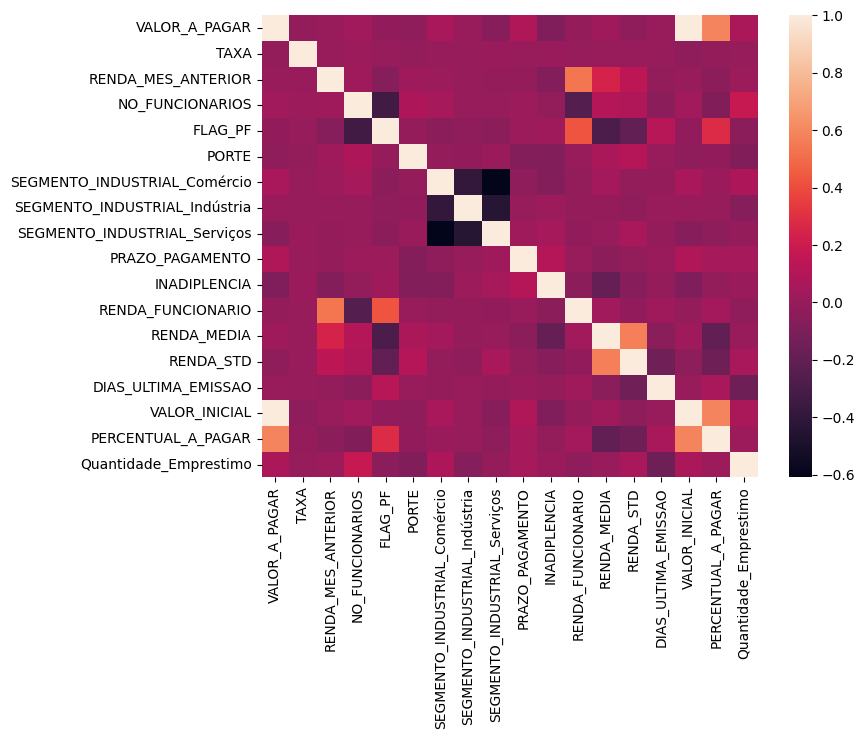

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_train_final.corr(method='pearson'))

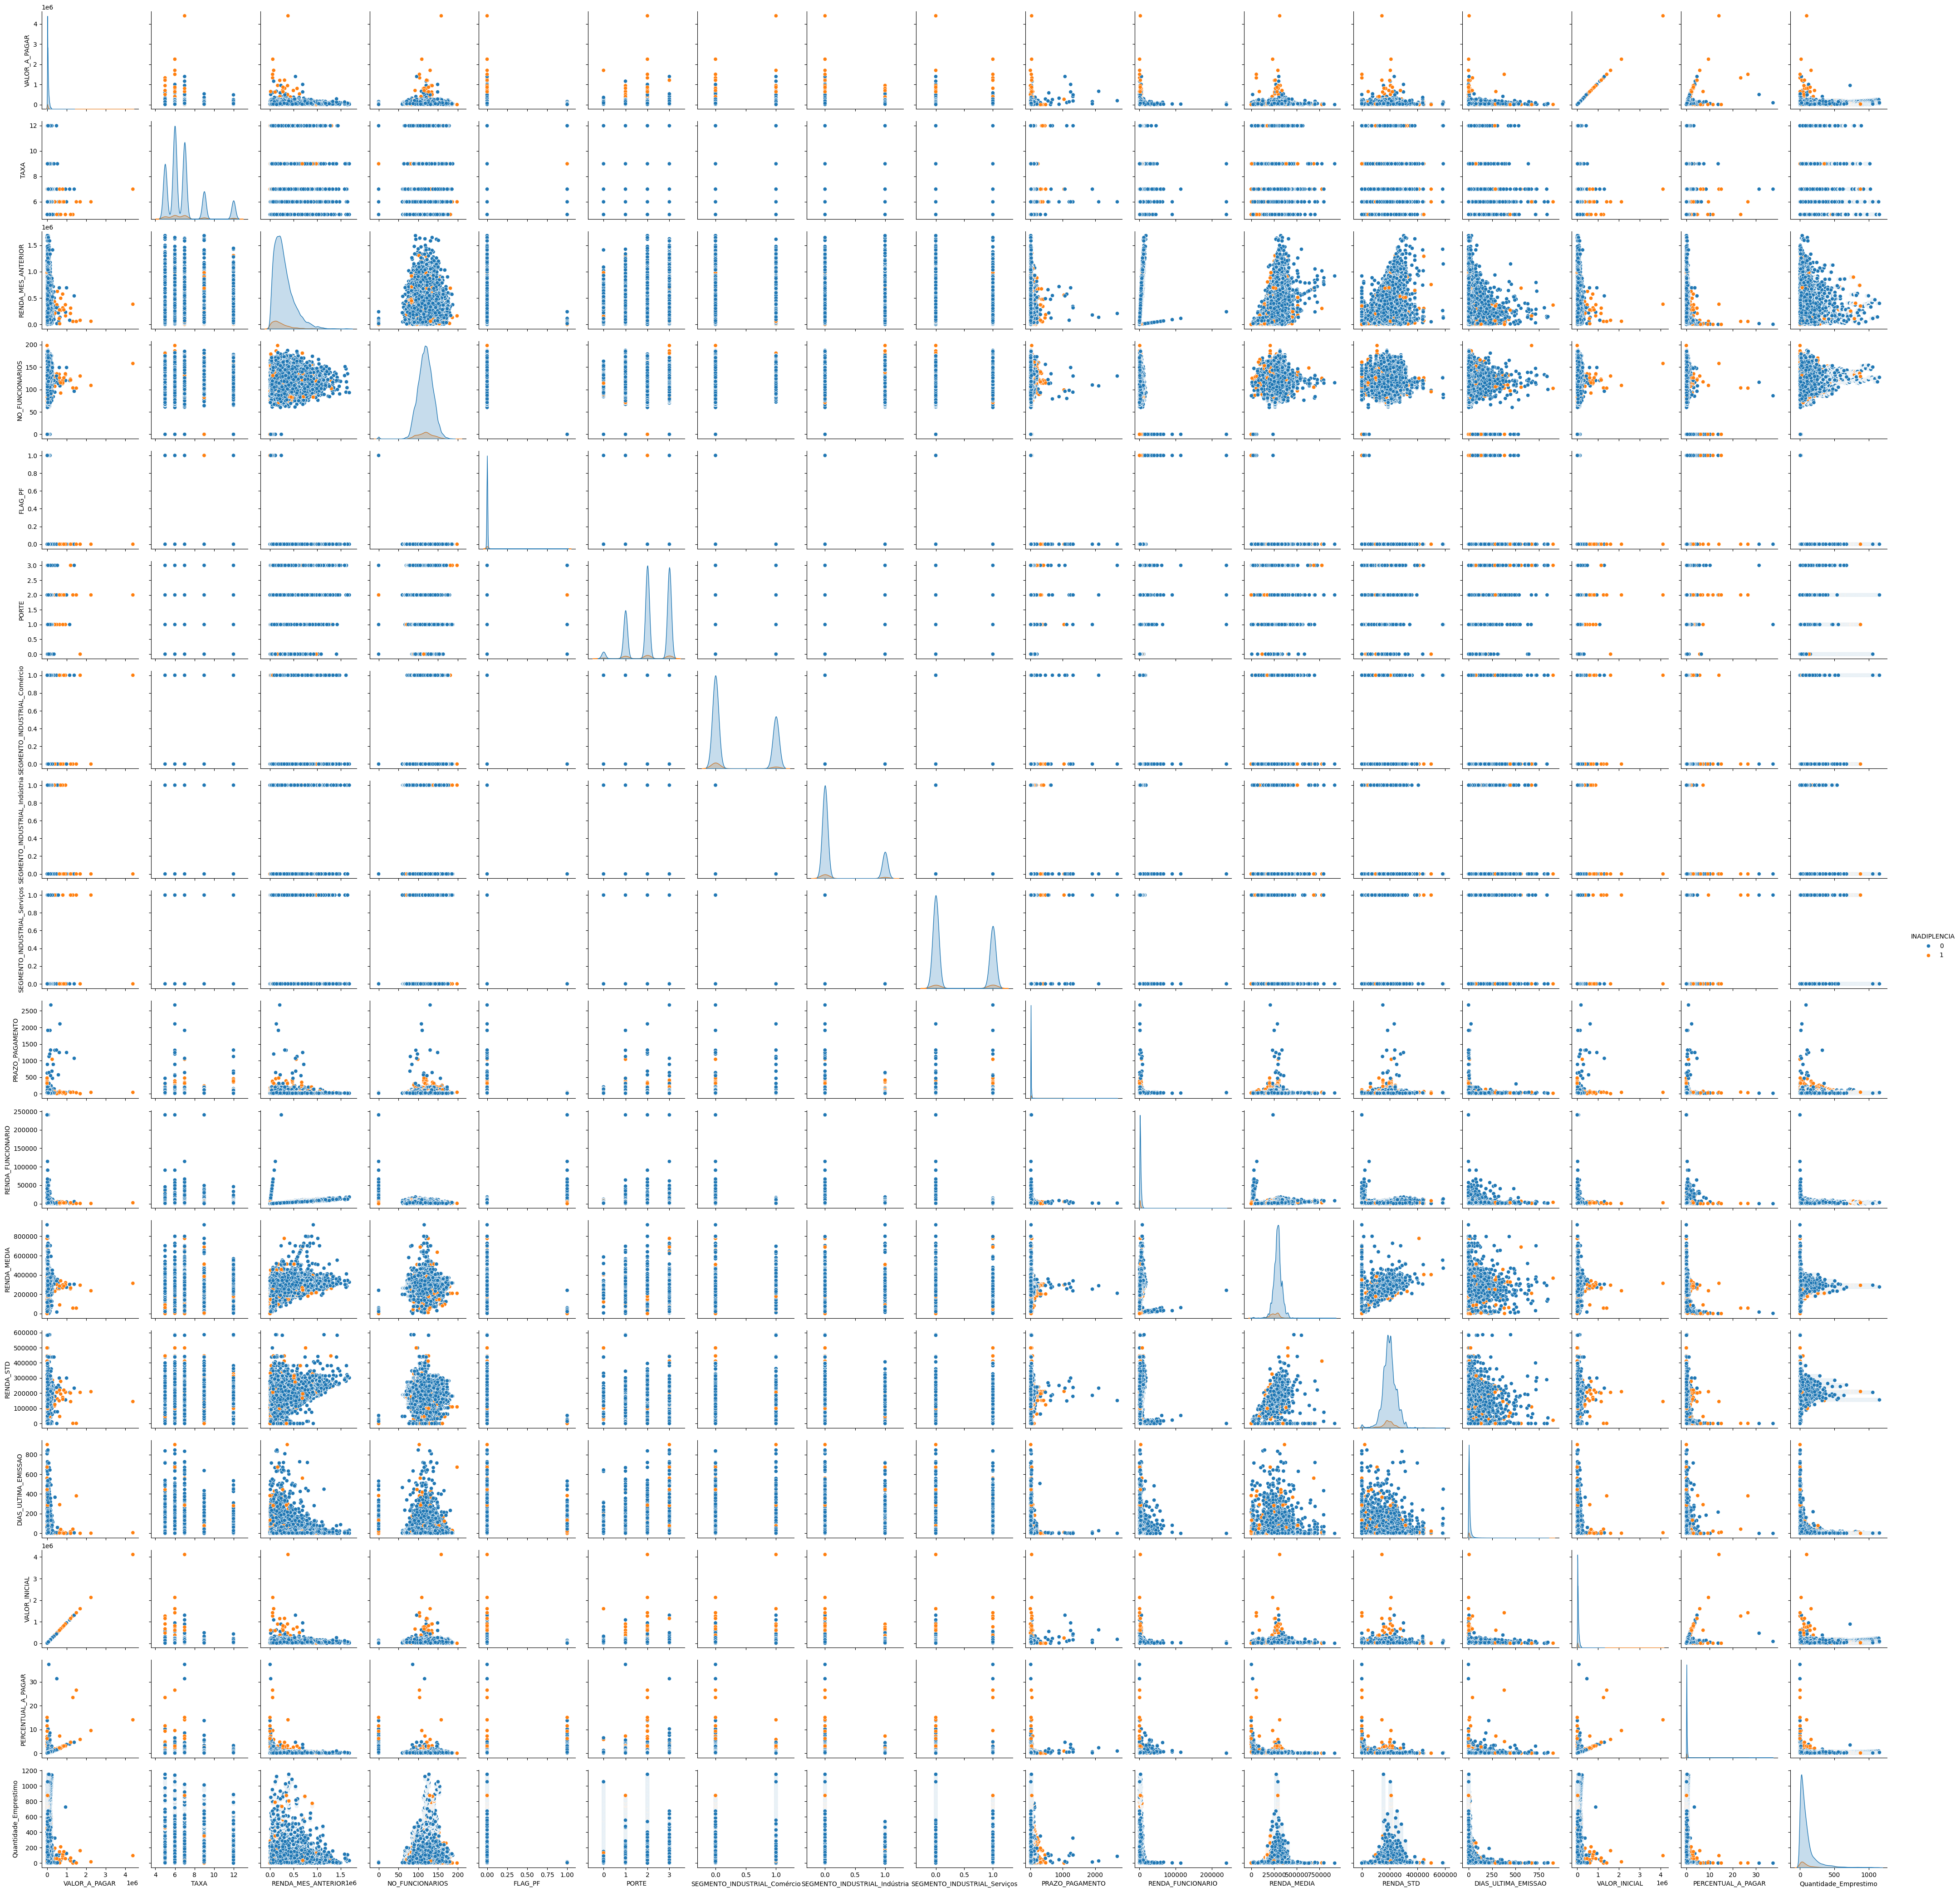

In [57]:
sns.pairplot(df_train_final, hue='INADIPLENCIA')

Nenhuma das features permite uma clara separação das classes alvo do problema. <br>
A feature DIAS_ULTIMA_EMISSAO possui uma separação muito ruim e VALOR_INCIAL possui uma forte correlação com Valor_Total, então serão removidas

### Preparação do dado de teste

In [83]:
df_test = base_teste_df.merge(base_info_df, on=['ID_CLIENTE', 'SAFRA_REF'], how='left')
df_test = df_test.merge(base_cadastral_df, on='ID_CLIENTE', how='left')
df_test

ID_CLIENTE SAFRA_REF DATA_EMISSAO_DOCUMENTO DATA_VENCIMENTO  \
0      5058298901476893676   2021-07             2021-07-14      2021-08-04   
1       274692171162531764   2021-07             2021-07-08      2021-08-23   
2       274692171162531764   2021-07             2021-07-11      2021-08-25   
3       274692171162531764   2021-07             2021-07-16      2021-08-30   
4       465309249432033993   2021-07             2021-07-05      2021-07-30   
...                    ...       ...                    ...             ...   
12270   705648002974742140   2021-11             2021-11-25      2021-12-13   
12271  4993499380140734678   2021-11             2021-11-25      2021-12-13   
12272  4614484019183480654   2021-11             2021-11-26      2028-09-30   
12273  1299146298565441811   2021-11             2021-11-26      2021-12-13   
12274  4061297388883391410   2021-11             2021-11-28      2021-12-23   

       VALOR_A_PAGAR  TAXA  RENDA_MES_ANTERIOR  NO_FUNCIONARIOS DATA_CADASTRO  \
0           11204.75  4.99            467430.0            154.0    2014-03-30   
1           60718.50  5.99            417192.0            104.0    2005-08-03   
2           60718.50  5.99            417192.0            104.0    2005-08-03   
3           62250.00  5.99            417192.0            104.0    2005-08-03   
4           26593.95  6.99            873938.0            119.0    2014-07-23   
...              ...   ...                 ...              ...           ...   
12270       47010.00  6.99                 NaN              NaN    2020-01-26   
12271      122875.35  8.99            311422.0            150.0    2015-11-24   
12272      302200.00  5.99                 NaN              NaN    2011-02-14   
12273      143791.85  5.99            220341.0            122.0    2000-08-15   
12274       23724.10  4.99            204643.0            124.0    2012-03-11   

      DDD FLAG_PF SEGMENTO_INDUSTRIAL DOMINIO_EMAIL    PORTE CEP_2_DIG  
0      54     NaN            Serviços         GMAIL    MEDIO        99  
1      19     NaN            Serviços         GMAIL  PEQUENO        13  
2      19     NaN            Serviços         GMAIL  PEQUENO        13  
3      19     NaN            Serviços         GMAIL  PEQUENO        13  
4      69     NaN            Comércio         GMAIL   GRANDE        76  
...    ..     ...                 ...           ...      ...       ...  
12270  67     NaN           Indústria         YAHOO    MEDIO        79  
12271  31     NaN            Serviços         GMAIL  PEQUENO        37  
12272  51     NaN           Indústria         YAHOO    MEDIO        93  
12273  21     NaN            Serviços       HOTMAIL    MEDIO        21  
12274  47     NaN            Serviços         YAHOO   GRANDE        89  

[12275 rows x 15 columns]

Cópia do tratamento feito no dado de teste

In [84]:
df_test['FLAG_PF'] = df_test['FLAG_PF'].apply(lambda x: 1 if x == 'X' else 0)

df_test.loc[df_test['FLAG_PF'] == 1, 'SEGMENTO_INDUSTRIAL'] = 'PESSOA_FISICA'
df_test.fillna({"SEGMENTO_INDUSTRIAL": "OUTRO"}, inplace=True)

ohe_segmento_array = ohe_segmento.transform(df_test[['SEGMENTO_INDUSTRIAL']])
ohe_df = pd.DataFrame(ohe_segmento_array, columns=ohe_segmento.get_feature_names_out(['SEGMENTO_INDUSTRIAL']))
ohe_df.drop(columns=['SEGMENTO_INDUSTRIAL_PESSOA_FISICA', 'SEGMENTO_INDUSTRIAL_OUTRO'], inplace=True)
df_test = pd.concat([df_test, ohe_df], axis=1).drop(columns='SEGMENTO_INDUSTRIAL')

df_test.fillna({"PORTE": "INDISPONIVEL"}, inplace=True)
df_test['PORTE'] = oe_porte.transform(df_test[['PORTE']]).reshape(1, -1)[0]

def fill_info(df_client):
    if df_client['NO_FUNCIONARIOS'].isna().any() or df_client['RENDA_MES_ANTERIOR'].isna().any():
        client = df_client['ID_CLIENTE'].tolist()[0]
        median_no_funcionarios = df_train[df_train['ID_CLIENTE'] == client]['NO_FUNCIONARIOS'].median()
        median_renda_mes_anterior = df_train[df_train['ID_CLIENTE'] == client]['RENDA_MES_ANTERIOR'].median()
        df_client.fillna({'NO_FUNCIONARIOS': median_no_funcionarios, 'RENDA_MES_ANTERIOR': median_renda_mes_anterior}, inplace=True)
        
    return df_client
        
df_test = df_test.groupby(by='ID_CLIENTE').apply(fill_info).reset_index(drop=True)


df_test.loc[df_test['FLAG_PF'] == 1, 'NO_FUNCIONARIOS'] = 0

df_test.fillna({'RENDA_MES_ANTERIOR': df_train['RENDA_MES_ANTERIOR'].median(), 'NO_FUNCIONARIOS': df_train['NO_FUNCIONARIOS'].median()}, inplace=True)

df_test['DATA_VENCIMENTO'] = df_test.apply(lambda row: row['DATA_EMISSAO_DOCUMENTO'] + pd.to_timedelta(18, unit='d') 
                                                       if row['DATA_EMISSAO_DOCUMENTO'] >= row['DATA_VENCIMENTO'] 
                                                       else row['DATA_VENCIMENTO'], axis=1)

df_test

/tmp/ipykernel_209911/3548784146.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_test = df_test.groupby(by='ID_CLIENTE').apply(fill_info).reset_index(drop=True)


ID_CLIENTE SAFRA_REF DATA_EMISSAO_DOCUMENTO DATA_VENCIMENTO  \
0         8784237149961904   2021-07             2021-07-02      2021-07-20   
1         8784237149961904   2021-07             2021-07-15      2021-08-02   
2         8784237149961904   2021-07             2021-07-27      2021-08-12   
3         8784237149961904   2021-08             2021-08-01      2021-08-17   
4         8784237149961904   2021-08             2021-08-05      2021-08-23   
...                    ...       ...                    ...             ...   
12270  9206030810342980458   2021-11             2021-11-05      2021-11-22   
12271  9206030810342980458   2021-11             2021-11-11      2021-11-29   
12272  9206030810342980458   2021-11             2021-11-14      2021-11-30   
12273  9206030810342980458   2021-11             2021-11-19      2021-12-06   
12274  9206030810342980458   2021-11             2021-11-22      2021-12-08   

       VALOR_A_PAGAR   TAXA  RENDA_MES_ANTERIOR  NO_FUNCIONARIOS  \
0          138986.90   5.99            384807.0            124.0   
1           62641.90   5.99            384807.0            124.0   
2          116033.85   8.99            384807.0            124.0   
3           45597.80   8.99            103248.0            119.0   
4           46317.75   8.99            103248.0            119.0   
...              ...    ...                 ...              ...   
12270       88179.95  11.99            856312.0            107.0   
12271       27301.65  11.99            856312.0            107.0   
12272       29051.65  11.99            856312.0            107.0   
12273      110061.00   4.99            856312.0            107.0   
12274       28826.65   4.99            856312.0            107.0   

      DATA_CADASTRO DDD  FLAG_PF DOMINIO_EMAIL  PORTE CEP_2_DIG  \
0        2011-02-14  11        0       HOTMAIL    1.0        27   
1        2011-02-14  11        0       HOTMAIL    1.0        27   
2        2011-02-14  11        0       HOTMAIL    1.0        27   
3        2011-02-14  11        0       HOTMAIL    1.0        27   
4        2011-02-14  11        0       HOTMAIL    1.0        27   
...             ...  ..      ...           ...    ...       ...   
12270    2005-08-08  11        0       HOTMAIL    2.0        91   
12271    2005-08-08  11        0       HOTMAIL    2.0        91   
12272    2005-08-08  11        0       HOTMAIL    2.0        91   
12273    2005-08-08  11        0       HOTMAIL    2.0        91   
12274    2005-08-08  11        0       HOTMAIL    2.0        91   

       SEGMENTO_INDUSTRIAL_Comércio  SEGMENTO_INDUSTRIAL_Indústria  \
0                               1.0                            0.0   
1                               1.0                            0.0   
2                               1.0                            0.0   
3                               1.0                            0.0   
4                               1.0                            0.0   
...                             ...                            ...   
12270                           0.0                            0.0   
12271                           0.0                            0.0   
12272                           0.0                            0.0   
12273                           0.0                            0.0   
12274                           0.0                            0.0   

       SEGMENTO_INDUSTRIAL_Serviços  
0                               0.0  
1                               0.0  
2                               0.0  
3                               0.0  
4                               0.0  
...                             ...  
12270                           1.0  
12271                           1.0  
12272                           1.0  
12273                           1.0  
12274                           1.0  

[12275 rows x 17 columns]

Adição das features criadas no dado de treino

In [85]:
df_test["RENDA_FUNCIONARIO"] = df_test.apply(lambda row: row["RENDA_MES_ANTERIOR"] / row["NO_FUNCIONARIOS"] if row["NO_FUNCIONARIOS"] > 0 else row["RENDA_MES_ANTERIOR"], axis=1)

df_test = df_test.merge(renda_media_df, on="ID_CLIENTE", how='left')

df_test = df_test.merge(renda_std_df, on="ID_CLIENTE", how='left')

df_test['PRAZO_PAGAMENTO'] = (df_test['DATA_VENCIMENTO'] - df_test['DATA_EMISSAO_DOCUMENTO']).dt.days

df_test['VALOR_INICIAL'] = df_test['VALOR_A_PAGAR'] / (1 + df_test['TAXA'])

df_test['DIAS_ULTIMA_EMISSAO'] = df_test[["ID_CLIENTE", "DATA_EMISSAO_DOCUMENTO"]].sort_values(by='DATA_EMISSAO_DOCUMENTO').groupby("ID_CLIENTE")['DATA_EMISSAO_DOCUMENTO'].diff().dt.days

def get_train_data(row):
    client_df = df_train[df_train['ID_CLIENTE'] == row['ID_CLIENTE']].sort_values("DATA_EMISSAO_DOCUMENTO")

    if client_df.empty:
        return -1
    else:
        return int((row['DATA_EMISSAO_DOCUMENTO'] - client_df.tail(1)['DATA_EMISSAO_DOCUMENTO']).dt.days)
        
df_test['DIAS_ULTIMA_EMISSAO'] = df_test.apply(lambda row: get_train_data(row) if pd.isna(row['DIAS_ULTIMA_EMISSAO']) else row['DIAS_ULTIMA_EMISSAO'], axis=1)

def find_info_2(row):
    df_client = df_train[df_train['ID_CLIENTE'] == row["ID_CLIENTE"]].tail(1)
    if not df_client.empty:
        return row['Quantidade_Emprestimo'] + int(df_client['Quantidade_Emprestimo'])
        
    return row['Quantidade_Emprestimo']
    
df_test["Quantidade_Emprestimo"] = 1
df_test = df_test.sort_values(by='DATA_EMISSAO_DOCUMENTO')
df_test["Quantidade_Emprestimo"] = df_test[["ID_CLIENTE", "Quantidade_Emprestimo"]].groupby("ID_CLIENTE").cumsum()["Quantidade_Emprestimo"]
    
df_test["Quantidade_Emprestimo"] = df_test.apply(lambda row: find_info_2(row), axis=1)

df_test

/tmp/ipykernel_209911/4228987103.py:19: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  return int((row['DATA_EMISSAO_DOCUMENTO'] - client_df.tail(1)['DATA_EMISSAO_DOCUMENTO']).dt.days)
/tmp/ipykernel_209911/4228987103.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  return row['Quantidade_Emprestimo'] + int(df_client['Quantidade_Emprestimo'])


ID_CLIENTE SAFRA_REF DATA_EMISSAO_DOCUMENTO DATA_VENCIMENTO  \
9292   6987942592445950913   2021-07             2021-07-01      2021-07-19   
7504   5761480994209806499   2021-07             2021-07-01      2021-07-19   
10758  8163895533020293251   2021-07             2021-07-01      2021-07-26   
104     113538242419211987   2021-07             2021-07-01      2021-07-19   
2278   1616952665234409442   2021-07             2021-07-01      2021-07-23   
...                    ...       ...                    ...             ...   
6324   4993499380140734678   2021-11             2021-11-25      2021-12-13   
8515   6486277549325701534   2021-11             2021-11-25      2021-12-14   
5767   4614484019183480654   2021-11             2021-11-26      2028-09-30   
1983   1299146298565441811   2021-11             2021-11-26      2021-12-13   
5204   4061297388883391410   2021-11             2021-11-28      2021-12-23   

       VALOR_A_PAGAR   TAXA  RENDA_MES_ANTERIOR  NO_FUNCIONARIOS  \
9292        91012.70   6.99            305035.0            141.0   
7504        28067.60   5.99            385397.0            142.0   
10758        7155.82   6.99            513088.0            111.0   
104         35455.07   5.99            244944.0            100.0   
2278        47173.99   5.99             98492.0            118.0   
...              ...    ...                 ...              ...   
6324       122875.35   8.99            311422.0            150.0   
8515        24005.50  11.99            269274.0            124.0   
5767       302200.00   5.99            229034.0            109.0   
1983       143791.85   5.99            220341.0            122.0   
5204        23724.10   4.99            204643.0            124.0   

      DATA_CADASTRO  DDD  ...  SEGMENTO_INDUSTRIAL_Comércio  \
9292     2000-08-15   (1  ...                           0.0   
7504     2015-12-29  NaN  ...                           1.0   
10758    2019-12-25   41  ...                           0.0   
104      2019-06-20   44  ...                           1.0   
2278     2011-12-04  NaN  ...                           1.0   
...             ...  ...  ...                           ...   
6324     2015-11-24   31  ...                           0.0   
8515     2008-08-11   14  ...                           0.0   
5767     2011-02-14   51  ...                           0.0   
1983     2000-08-15   21  ...                           0.0   
5204     2012-03-11   47  ...                           0.0   

      SEGMENTO_INDUSTRIAL_Indústria  SEGMENTO_INDUSTRIAL_Serviços  \
9292                            0.0                           1.0   
7504                            0.0                           0.0   
10758                           0.0                           1.0   
104                             0.0                           0.0   
2278                            0.0                           0.0   
...                             ...                           ...   
6324                            0.0                           1.0   
8515                            0.0                           1.0   
5767                            1.0                           0.0   
1983                            0.0                           1.0   
5204                            0.0                           1.0   

      RENDA_FUNCIONARIO    RENDA_MEDIA      RENDA_STD  PRAZO_PAGAMENTO  \
9292        2163.368794  272717.200000  165661.538101               18   
7504        2714.063380  293850.571429  204946.212816               18   
10758       4622.414414  208321.428571  118619.100684               25   
104         2449.440000  226334.000000       0.000000               18   
2278         834.677966  292821.093750  272886.057839               22   
...                 ...            ...            ...              ...   
6324        2076.146667  288411.333333  227195.909138               18   
8515        2171.564516  182380.052632  166876.282334               19  

Como existem clientes novos no dado de teste, não foi possivel preencher as colunas RENDA_MEDIA e RENDA_STD totalmente. Nesse caso, para preencher os valores nulos, usarei o proprio dado de teste

In [87]:
renda_std_teste_df = df_test[["ID_CLIENTE", "SAFRA_REF", "RENDA_MES_ANTERIOR"]].drop_duplicates(subset=['ID_CLIENTE', 'SAFRA_REF']).drop(columns=["SAFRA_REF"]).groupby("ID_CLIENTE").std()
renda_std_teste_df.reset_index(inplace=True)
renda_std_teste_df.rename(columns={'RENDA_MES_ANTERIOR': 'RENDA_STD'}, inplace=True)
renda_std_teste_df['RENDA_STD'].fillna(0, inplace=True)

renda_media_teste_df = df_test[["ID_CLIENTE", "SAFRA_REF", "RENDA_MES_ANTERIOR"]].drop_duplicates(subset=['ID_CLIENTE', 'SAFRA_REF']).drop(columns=["SAFRA_REF"]).groupby("ID_CLIENTE").mean()
renda_media_teste_df.reset_index(inplace=True)
renda_media_teste_df.rename(columns={'RENDA_MES_ANTERIOR': 'RENDA_MEDIA'}, inplace=True)
renda_media_teste_df['RENDA_MEDIA'].fillna(0, inplace=True)

/tmp/ipykernel_209911/1739979072.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  renda_std_teste_df['RENDA_STD'].fillna(0, inplace=True)
/tmp/ipykernel_209911/1739979072.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [92]:
df_test['RENDA_STD'] = df_test.apply(lambda row: renda_std_teste_df[renda_std_teste_df['ID_CLIENTE'] == row['ID_CLIENTE']]['RENDA_STD'].tolist()[0]
                                     if pd.isna(row['RENDA_STD'])
                                     else row['RENDA_STD'], axis=1)

df_test['RENDA_MEDIA'] = df_test.apply(lambda row: renda_media_teste_df[renda_media_teste_df['ID_CLIENTE'] == row['ID_CLIENTE']]['RENDA_MEDIA'].tolist()[0]
                                       if pd.isna(row['RENDA_MEDIA'])
                                       else row['RENDA_MEDIA'], axis=1)

In [93]:
df_test['PERCENTUAL_A_PAGAR'] = df_test['VALOR_A_PAGAR'] / df_test['RENDA_MEDIA']

In [94]:
df_test_final = df_test.drop(columns=['DATA_EMISSAO_DOCUMENTO', 'DATA_VENCIMENTO', 'DATA_CADASTRO', 'DDD', 'DOMINIO_EMAIL', 'CEP_2_DIG'])
df_test_final

ID_CLIENTE SAFRA_REF  VALOR_A_PAGAR   TAXA  \
9292   6987942592445950913   2021-07       91012.70   6.99   
7504   5761480994209806499   2021-07       28067.60   5.99   
10758  8163895533020293251   2021-07        7155.82   6.99   
104     113538242419211987   2021-07       35455.07   5.99   
2278   1616952665234409442   2021-07       47173.99   5.99   
...                    ...       ...            ...    ...   
6324   4993499380140734678   2021-11      122875.35   8.99   
8515   6486277549325701534   2021-11       24005.50  11.99   
5767   4614484019183480654   2021-11      302200.00   5.99   
1983   1299146298565441811   2021-11      143791.85   5.99   
5204   4061297388883391410   2021-11       23724.10   4.99   

       RENDA_MES_ANTERIOR  NO_FUNCIONARIOS  FLAG_PF  PORTE  \
9292             305035.0            141.0        0    2.0   
7504             385397.0            142.0        0    0.0   
10758            513088.0            111.0        0    2.0   
104              244944.0            100.0        0    2.0   
2278              98492.0            118.0        0    3.0   
...                   ...              ...      ...    ...   
6324             311422.0            150.0        0    1.0   
8515             269274.0            124.0        0    2.0   
5767             229034.0            109.0        0    2.0   
1983             220341.0            122.0        0    2.0   
5204             204643.0            124.0        0    3.0   

       SEGMENTO_INDUSTRIAL_Comércio  SEGMENTO_INDUSTRIAL_Indústria  \
9292                            0.0                            0.0   
7504                            1.0                            0.0   
10758                           0.0                            0.0   
104                             1.0                            0.0   
2278                            1.0                            0.0   
...                             ...                            ...   
6324                            0.0                            0.0   
8515                            0.0                            0.0   
5767                            0.0                            1.0   
1983                            0.0                            0.0   
5204                            0.0                            0.0   

       SEGMENTO_INDUSTRIAL_Serviços  RENDA_FUNCIONARIO    RENDA_MEDIA  \
9292                            1.0        2163.368794  272717.200000   
7504                            0.0        2714.063380  293850.571429   
10758                           1.0        4622.414414  208321.428571   
104                             0.0        2449.440000  226334.000000   
2278                            0.0         834.677966  292821.093750   
...                             ...                ...            ...   
6324                            1.0        2076.146667  288411.333333   
8515                            1.0        2171.564516  182380.052632   
5767                            0.0        2101.229358  271745.030303   
1983                            1.0        1806.073770  243740.000000   
5204                            1.0        1650.346774  243385.114286   

           RENDA_STD  PRAZO_PAGAMENTO  VALOR_INICIAL  DIAS_ULTIMA_EMISSAO  \
9292   165661.538101               18   11390.826033                  4.0   
7504   204946.212816               18    4015.393419                  1.0   
10758  118619.100684               25     895.596996                  1.0   
104         0.000000               18    5072.256080                158.0   
2278   272886.057839               22    6748.782546                 15.0   
...              ...              ...            ...                  ...   
6324   227195.909138               18   12299.834835                 27.0   
8515   166876.282334               19    1847.998460                  7.0   
5767   140802.789766             2500   43233.190272                 66.0   
1983   172876.094535               17 

### Salvamento do dado tratado

In [95]:
df_train_final.to_csv("./dataset/treinamento.csv", index=False)
df_test_final.to_csv("./dataset/teste.csv", index=False)